# AI Community @ Семинар  №5
## Домашнее задание

В этом домашнем задании вы будете исследовать несколько наборов данных.  
Для каждого набора данных нужно выполнить задания:

1. _(1 балл)_ Сделать визуализацию данных в 2D с помощью PCA.
2. _(1 балл)_ Сделать визуализацию данных в 2D с помощью t-SNE.
3. _(2 балла)_ Пояснить словами обе визуализации. 
4. _(2 балла)_ Выбрать классификатор (регрессия, деревья). Сравнить результаты предсказания по метрике F1-score в трех случаях - обычные данные, обработанные с помощью PCA, обработанные с помощью t-SNE.
5. _(1 балл)_ Указать для каждого набора данных размерность, до которой нужно уменьшить изначальную размерность данных, чтобы получить наилучшее предсказание по метрике f1.

In [296]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, \
                             GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge

from sklearn.metrics import f1_score

from sklearn.preprocessing import LabelEncoder, Imputer
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [254]:
pd.options.mode.chained_assignment = None

## 0. Предсказание неявки пациента к врачу
Необходимо сделать предсказание о том, придет ли пациент(-ка) в назначенное время к врачу (0) или не придет (1).  
Данные содержат 13 признаков. Признак `Scholarship` означает наличие [Bolsa Família](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia).  
Нужно разбить данные на `train` и `test` с помощью `train_test_split()`, обучиться на `train` и предсказать значения для `test`.  

In [255]:
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%dT%H:%M:%SZ')

In [256]:
X = pd.read_csv("./data/noshowappointments.csv", parse_dates=["ScheduledDay","AppointmentDay"], date_parser=dateparse)
y = X['No-show']
X = X.drop('No-show', axis=1)

In [257]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.3, 
                                                    stratify=y, 
                                                    random_state=41)

In [258]:
x_train = x_train.drop(["PatientId", "AppointmentID"], axis=1)
x_test = x_test.drop(["PatientId", "AppointmentID"], axis=1)

In [259]:
#dividing date columns
x_train['ScheduledDayYear'] = x_train["ScheduledDay"].dt.year
x_train['ScheduledDayMonth'] = x_train["ScheduledDay"].dt.month
x_train['AppointmentDayYear'] = x_train["AppointmentDay"].dt.year
x_train['AppointmentDayMonth'] = x_train["AppointmentDay"].dt.month

x_train = x_train.drop(["ScheduledDay", "AppointmentDay"], axis=1)

In [260]:
#dividing date columns
x_test['ScheduledDayYear'] = x_test["ScheduledDay"].dt.year
x_test['ScheduledDayMonth'] = x_test["ScheduledDay"].dt.month
x_test['AppointmentDayYear'] = x_test["AppointmentDay"].dt.year
x_test['AppointmentDayMonth'] = x_test["AppointmentDay"].dt.month

x_test = x_test.drop(["ScheduledDay", "AppointmentDay"], axis=1)

In [261]:
gender_train = x_train["Gender"]
gender_test = x_test["Gender"]
ngbrhd_train = x_train["Neighbourhood"]
ngbrhd_test = x_test["Neighbourhood"]
lb = LabelEncoder()
new_genders_train = lb.fit_transform(gender_train)
new_genders_test = lb.fit_transform(gender_test)
new_ngbrhd_train = lb.fit_transform(ngbrhd_train)
new_ngbrhd_test = lb.fit_transform(ngbrhd_test)

In [262]:
x_train.loc[:,'Gender'] = new_genders_train
x_test.loc[:, 'Gender'] = new_genders_test
x_train.loc[:, "Neighbourhood"] = new_ngbrhd_train
x_test.loc[:, "Neighbourhood"] = new_ngbrhd_test

In [263]:
#to encode yes-no as 1-0
y_train = y_train.eq('Yes').mul(1)
y_test = y_test.eq('Yes').mul(1)

Урезала тут количество строк, потому что tSNE считался просто невозможно долго, оставила 40000 строк и для PCA, и для tSNE

In [278]:
interm_x = pd.concat([x_train, x_test])
interm_x.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,ScheduledDayYear,ScheduledDayMonth,AppointmentDayYear,AppointmentDayMonth
44785,0,29,26,1,0,0,0,0,0,2016,5,2016,5
24901,0,48,43,0,0,0,0,0,0,2016,5,2016,5
106682,0,8,67,0,0,0,0,0,0,2016,6,2016,6
87838,0,46,52,0,0,0,0,0,1,2016,5,2016,6
44171,1,7,27,1,0,0,0,0,0,2016,5,2016,5


In [279]:
pca = PCA(n_components=2)
pca.fit(interm_x)
X_pca = pca.transform(interm_x)

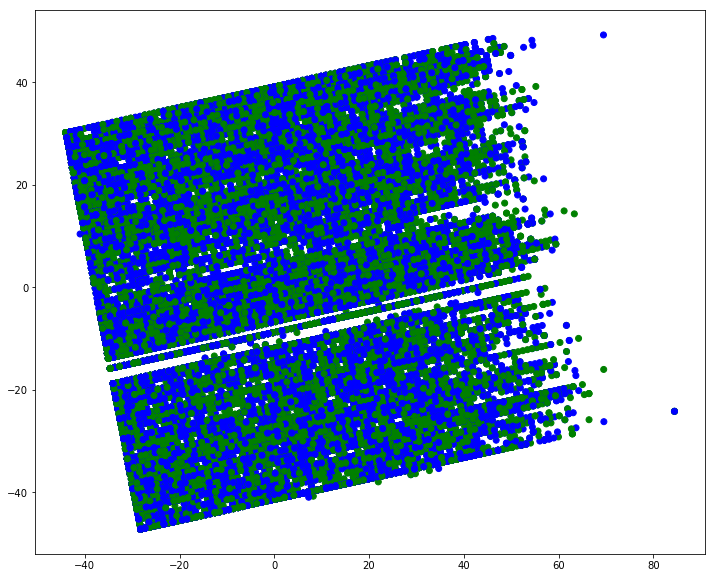

In [280]:
plt.figure(figsize=(12, 10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], color=['green','blue'])

In [165]:
tsne = TSNE(n_components=2)
data2d = tsne.fit_transform(x_train[:40000])

Какая-то странная инопланетная жесть получилась, мне кажется, я что-то сделала неправильно. А то это на червяков похоже

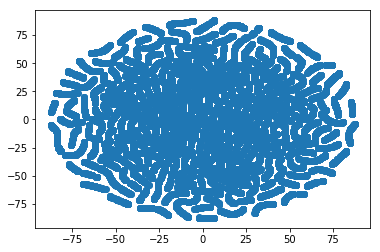

In [30]:
#цвет и кругляшки размера мельче marker size
plt.scatter(data2d[:,0], data2d[:,1])

## Пояснение словами
Теоретически tSNE вроде бы должна показать более понятный результат, но тут ничего не понятно ни в одном из случаев. С PCA можно видеть одну вроде бы колонку, которая выше - первая, и можно предположить, что может быть те данные, которые соответствуют ее, и будут теми пациантами, которые дойдут до врача. С tSNE ничего не понятно.
Еще один вариант - это то, что в данном случае задача отличается от того, что было разобрано на занятии. Там были явные кластеры данные, а здесь их нет, и результат предсказания может иметь только два класса - пришел/не пришел. Возможно в данном случае использование данных визуализаций не поможет. Может быть в предсказаниии поможет, правда, но сейчас посмотрим

## Предсказания

In [266]:
clf_regular = RandomForestClassifier(n_estimators=200, n_jobs=-1)
clf_regular.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [267]:
y_pred = clf_regular.predict(x_test)
f1_score(y_test,y_pred)

0.23836657169990505

In [270]:
len(x_train)

77368

In [283]:
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=.3)

y_train_pca = y_train_pca.eq('Yes').mul(1)
y_test_pca = y_test_pca.eq('Yes').mul(1)

clf_pca = RandomForestClassifier(n_estimators=200, n_jobs=-1)
clf_pca.fit(x_train_pca, y_train_pca)

y_pred_pca = clf_pca.predict(x_test_pca)

f1_score(y_test_pca, y_pred_pca)

0.14787535410764874

In [173]:
x_train_sne, x_test_sne, y_train_sne, y_test_sne = train_test_split(data2d, y[:40000], test_size=.3, 
                                                    random_state=41)

y_train_tsne = y_train_sne.eq('Yes').mul(1)
y_test_tsne = y_test_sne.eq('Yes').mul(1)

clf_tsne = LogisticRegression()
clf_tsne.fit(x_train_sne, y_train_tsne)

y_pred_tsne = clf_tsne.predict(x_test_sne)

f1_score(y_test_tsne, y_pred_tsne)

/Users/Sonya/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0

## 1. Предсказание команды-победителя в Dota 2  
Необходимо сделать предсказание о том, какая команда победит в матче [Dota 2](https://en.wikipedia.org/wiki/Dota_2) по информации о первых 5 минутах игры.  
Данные содержат 103 признака.  
Нужно разбить данные на `train` и `test` с помощью `train_test_split`, обучиться на `train` и предсказать значения для `test.  
Данные имеют пропуски.

In [289]:
X = pd.read_csv("./data/dota_features.csv")
y = X['radiant_win']
X = X.drop(['radiant_win', 'duration', 
            'tower_status_radiant', 'tower_status_dire',
            'barracks_status_radiant', 'barracks_status_dire', 'start_time'], axis=1)

In [297]:
imp = Imputer()
X = imp.fit_transform(X)

### Визуализации

In [298]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.3, 
                                                    stratify=y, 
                                                    random_state=41)

In [343]:
pca = PCA(n_components=30)
pca.fit(X)
X_pca = pca.transform(X)

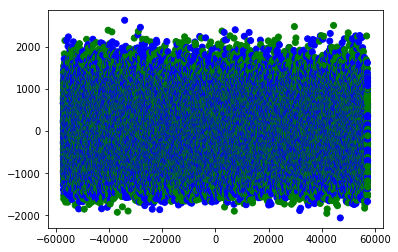

In [318]:
plt.scatter(X_pca[:,0], X_pca[:,1], color=["green","blue"])

In [320]:
tSNE = TSNE(n_components=2)
X_sne = tSNE.fit_transform(X)

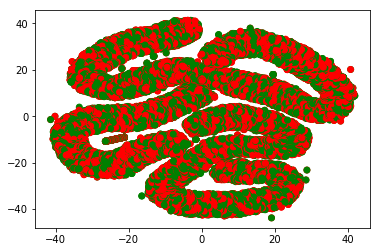

In [321]:
plt.scatter(X_sne[:,0], X_sne[:,1], color = ["green", "red"])

Опять тут какие-то червяки и полоски, выглядит как какой-то сюр.

### Предсказания

In [322]:
clf_regular = RandomForestClassifier(n_estimators=200, n_jobs=-1)
clf_regular.fit(x_train, y_train)

y_reg_pred = clf_regular.predict(x_test)
f1_score(y_test, y_reg_pred)

0.6653274147036905

In [344]:
x_tr_pca, x_t_pca, y_tr_pca, y_t_pca = train_test_split(X_pca, y, test_size=.3, 
                                                    stratify=y, 
                                                    random_state=41)

In [345]:
clf_pca = RandomForestClassifier(n_estimators=200, n_jobs=-1)
clf_pca.fit(x_tr_pca, y_tr_pca)

y_pca_pred = clf_pca.predict(x_t_pca)
f1_score(y_t_pca, y_pca_pred)

0.66090698444223772

In [326]:
x_train_sne, x_t_sne, y_train_sne, y_t_sne = train_test_split(X_sne, y, test_size=.3, stratify=y, random_state=41)

In [327]:
clf_tSNE = RandomForestClassifier(n_estimators=200, n_jobs=-1)
clf_tSNE.fit(x_train_sne, y_train_sne)

y_tsne_pred = clf_tSNE.predict(x_t_sne)
f1_score(y_t_sne, y_tsne_pred)

0.53898438010587535

Получается, что чем больше компонентов в PCA, тем лучше скор - при 2D получается около 0.54, а при 30 - 0.66, что похоже на результат на данных с неизмененной размерностью.
С SNE на 2D - 0.53 и из-за того, что это так долго занимает, я не меняла в нем количество компонентов.

## 2. Предсказание наличия болезни  
Необходимо сделать предсказание о наличии (1) или отсутствии (0) болезни для каждого пациента (пациентки).  
Данные содержат 1330 признаков. Столбцы с V2 по V331 соответствуют различным медицинским показателям, столбцы с V332 по V1331 соответствуют генетическим данным пациента.  
Нужно разбить данные на `train` и `test` с помощью `train_test_split()`, обучиться на `train` и предсказать значения для `test.  
Данные имеют пропуски.

In [346]:
X = pd.read_csv("./data/disease_prediction.csv")
y = X['target']
X = X.drop('target', axis=1)

In [347]:
X.head()

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V1322,V1323,V1324,V1325,V1326,V1327,V1328,V1329,V1330,V1331
0,826.0,0.0,0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,NaN,0.0,0.5
1,15.0,0.0,0,0.0,0.0,0.0,0.0,0.030303,0.083333,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.5,0.0,0.5,0.0
2,242.0,0.0,0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,1.0,1.0,0.0,0.5,0.0,0.0,1.0,0.0,0.0,0.5
3,1038.0,0.0,0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
4,971.0,0.0,0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,0.0,0.0,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0
